# Import libraries

In [ ]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from log_processing import *
from evaluation import *

# Log processing

In [5]:
%cd mmaction2

D:\jupyterNotebook\C8099\Project\mmaction2


In [39]:
# Process log for Task Normal

input_file = 'work_dirs/swin-base-goosebumps-project-task-normal-batch-8-801/20240801_123916/vis_data/20240801_123916.json'
output_file = 'work_dirs/swin-base-goosebumps-project-task-normal-batch-8-801/20240801_123916/vis_data/log.json'

update_log_file(input_file, output_file)

In [22]:
# Process log for Task Subclass

input_file = 'work_dirs/swin-base-goosebumps-project-task-subclass-eval-801/20240801_105136/vis_data/20240801_105136.json'
output_file = 'work_dirs/swin-base-goosebumps-project-task-subclass-eval-801/20240801_105136/vis_data/log.json'

update_log_file(input_file, output_file)

# Evaluation

## Task Normal

### Accuracy, Loss and Learning Rate 

In [5]:
%cd mmaction2

D:\jupyterNotebook\C8099\Project\mmaction2


In [5]:
file_path = 'work_dirs/project-experiment-result/swin-base/task-normal/log.json'

# Extract log data
loss, train_top1_acc, var_top1_acc, var_mean1_acc, var_mean_ap, iters, epochs, base_lr, lr = extract_log_data(file_path)

In [6]:
# Find the highest var_top1_acc and its corresponding epoch
max_acc = max(var_top1_acc)
max_acc_index = var_top1_acc.index(max_acc)
corresponding_epoch = epochs[max_acc_index]

# Output the results
print(f"Highest var_top1_acc: {max_acc}")
print(f"Corresponding epoch: {corresponding_epoch}")

Highest var_top1_acc: 0.9367816091954023
Corresponding epoch: 28


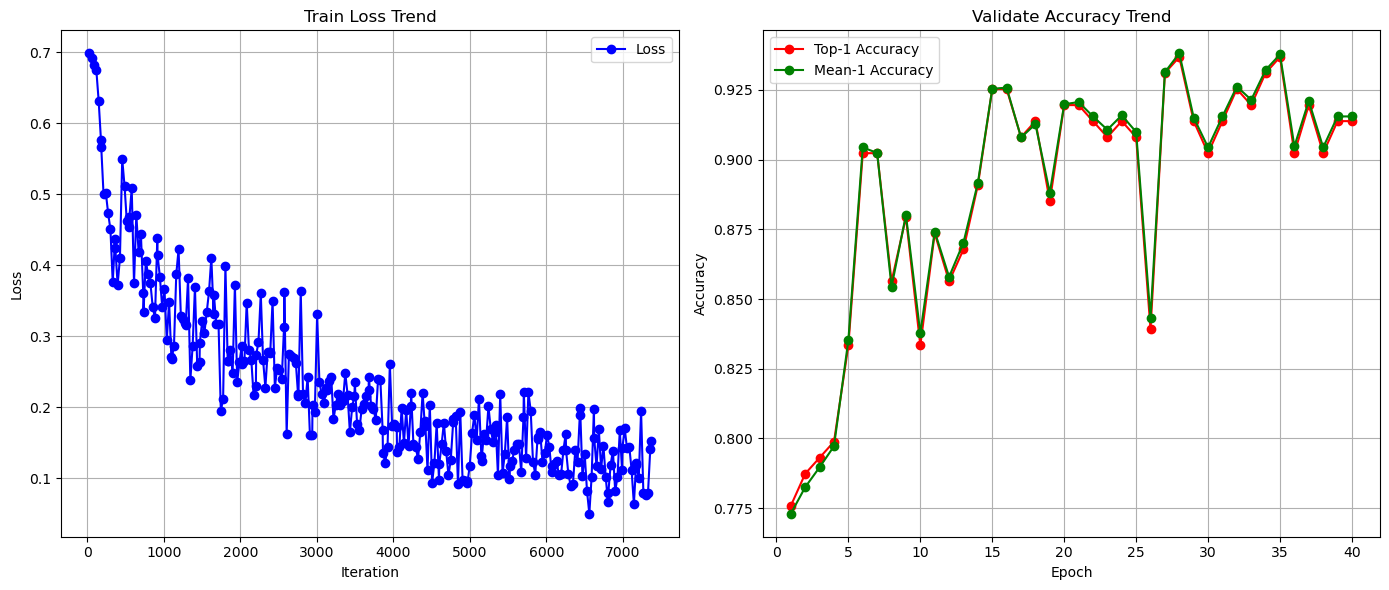

In [31]:
# train loss plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(iters, loss, marker='o', color='b', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Loss Trend')
plt.grid(True)
plt.legend()

# val accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, var_top1_acc, marker='o', color='r', label='Top-1 Accuracy')
plt.plot(epochs, var_mean1_acc, marker='o', color='g', label='Mean-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validate Accuracy Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-normal/loss and accuracy.jpg', dpi=300)
plt.show()

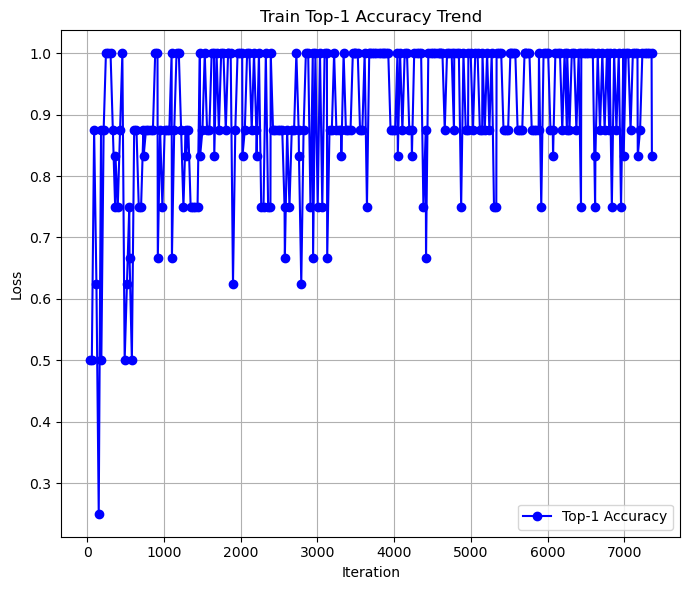

In [32]:
# Train Top-1 Accuracy plot
plt.figure(figsize=(7, 6))
plt.plot(iters, train_top1_acc, marker='o', color='b', label='Top-1 Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Top-1 Accuracy Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-normal/train accuracy.jpg', dpi=300)
plt.show()

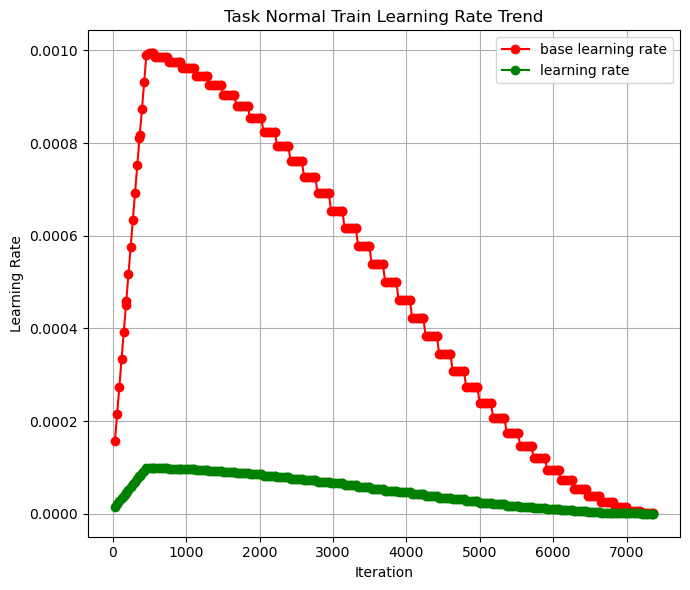

In [9]:
# learning rate plot
plt.figure(figsize=(7, 6))
plt.plot(iters, base_lr, marker='o', color='r', label='base learning rate')
plt.plot(iters, lr, marker='o', color='g', label='learning rate')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Task Normal Train Learning Rate Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-normal/learning rate.jpg', dpi=300)
plt.show()

### Precision, Recall, F1 Score, AUC-ROC

In [41]:
# Load the data from the test result pickle file
with open('work_dirs/trained-model/task-normal-model.pkl', 'rb') as file:
    normal_task_results = pickle.load(file)

In [42]:
# Evaluate metrics using the results from the Task Normal
task_normal_eval_metrics = evaluate_metrics(normal_task_results,2)

# Print the evaluation metrics
print(f"Precision: {task_normal_eval_metrics['precision']:.4f}")
print(f"Recall: {task_normal_eval_metrics['recall']:.4f}")
print(f"F1 Score: {task_normal_eval_metrics['f1']:.4f}")
print(f"AUC-ROC: {task_normal_eval_metrics['auc_roc']:.4f}")

Precision: 0.9396
Recall: 0.9343
F1 Score: 0.9340
AUC-ROC: 0.9782


### Confusion Matrix

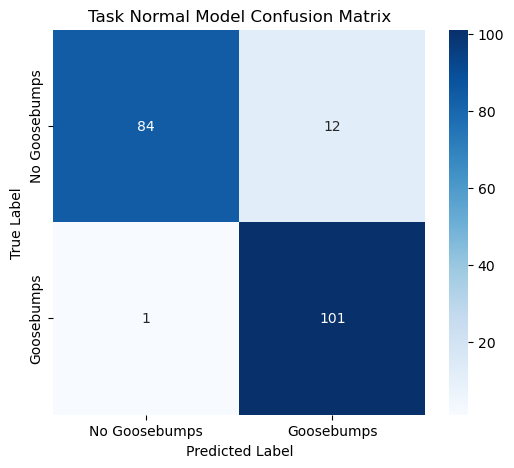

In [43]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(task_normal_eval_metrics['conf_matrix'], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Goosebumps', 'Goosebumps'], yticklabels=['No Goosebumps', 'Goosebumps'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Task Normal Model Confusion Matrix')
plt.savefig('work_dirs/project-experiment-result/swin-base/task-normal/confusion_matrix.jpg', dpi=300)
plt.show()

## Task Subclass 

In [6]:
file_path = 'work_dirs/project-experiment-result/swin-base/task-subclass/log.json'

# Extract log data
loss, train_top1_acc, var_top1_acc, var_mean1_acc, var_mean_ap, iters, epochs, base_lr, lr = extract_log_data(file_path)

In [11]:
# Find the highest var_top1_acc and its corresponding epoch
max_acc = max(var_top1_acc)
max_acc_index = var_top1_acc.index(max_acc)
corresponding_epoch = epochs[max_acc_index]

# Output the results
print(f"Highest var_top1_acc: {max_acc}")
print(f"Corresponding epoch: {corresponding_epoch}")

Highest var_top1_acc: 0.8690476190476191
Corresponding epoch: 26


### Accuracy, Loss and Learning Rate 

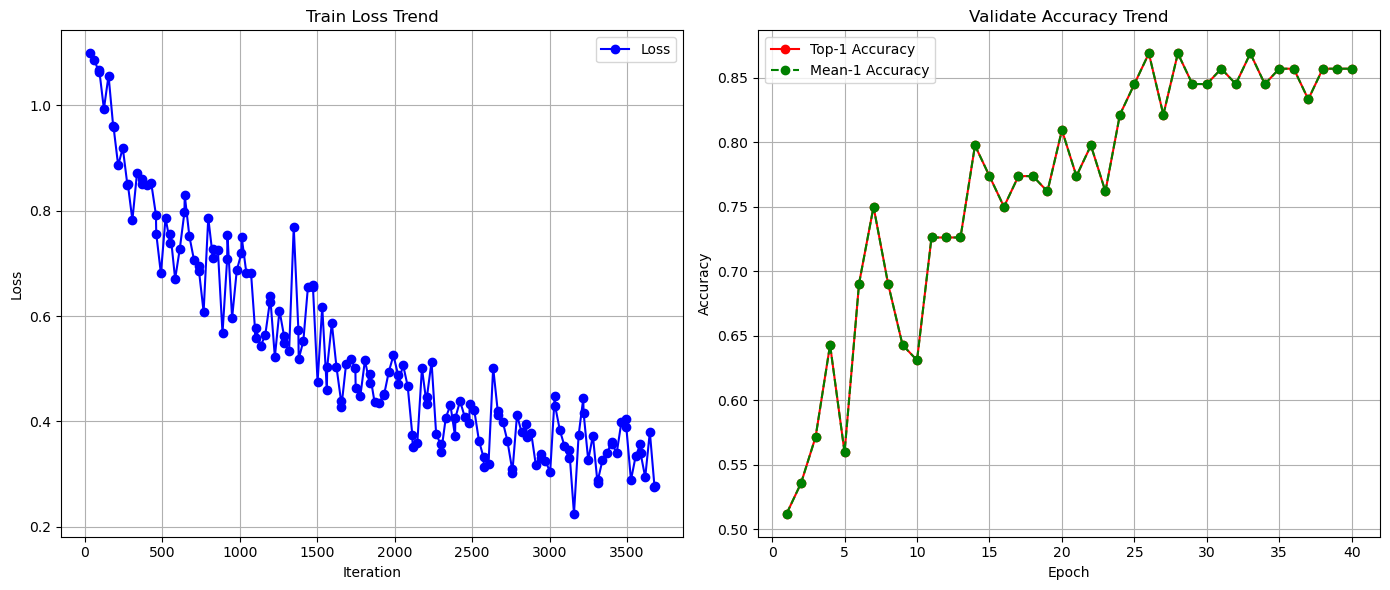

In [29]:
# train loss plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(iters, loss, marker='o', color='b', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Loss Trend')
plt.grid(True)
plt.legend()

# val accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, var_top1_acc, marker='o', color='r', linestyle='-', label='Top-1 Accuracy')
plt.plot(epochs, var_mean1_acc, marker='o', color='g', linestyle='--', label='Mean-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validate Accuracy Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-subclass/loss and accuracy.jpg', dpi=300)
plt.show()

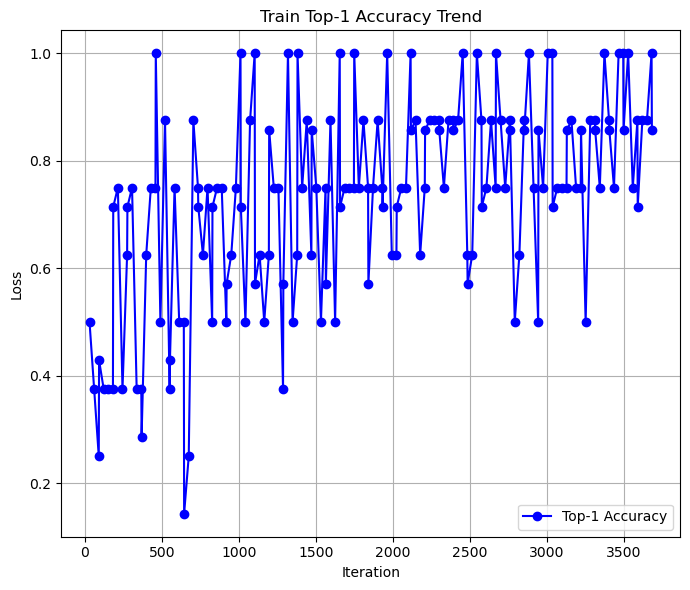

In [30]:
# Train Top-1 Accuracy plot
plt.figure(figsize=(7, 6))
plt.plot(iters, train_top1_acc, marker='o', color='b', label='Top-1 Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train Top-1 Accuracy Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-subclass/train accuracy.jpg', dpi=300)
plt.show()

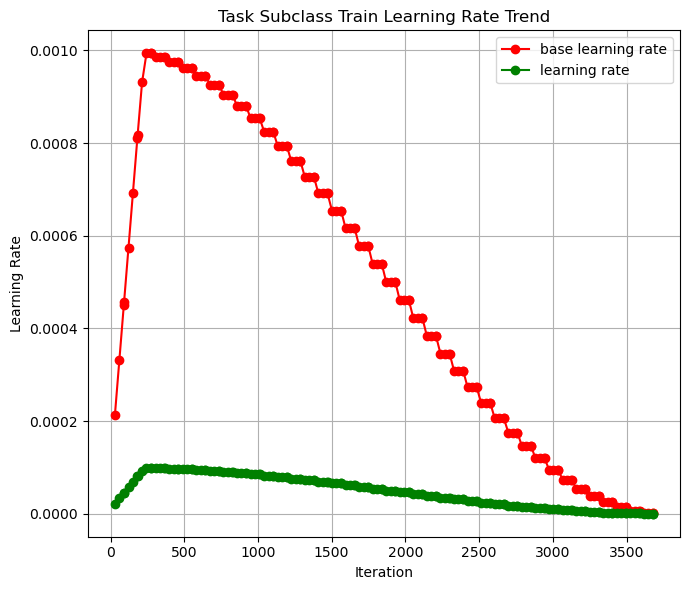

In [7]:
# learning rate plot
plt.figure(figsize=(7, 6))
plt.plot(iters, base_lr, marker='o', color='r', label='base learning rate')
plt.plot(iters, lr, marker='o', color='g', label='learning rate')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Task Subclass Train Learning Rate Trend')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('work_dirs/project-experiment-result/swin-base/task-subclass/learning rate.jpg', dpi=300)
plt.show()

### Precision, Recall, F1 Score, AUC-ROC

In [37]:
# Load the data from the test result pickle file
with open('work_dirs/trained-model/task-subclass-model.pkl', 'rb') as file:
    task_subclass_results = pickle.load(file)

In [38]:
# Evaluate metrics using the results from the Task Subclass
task_subclass_eval_metrics = evaluate_metrics(task_subclass_results,3)

# Print the evaluation metrics
print(f"Precision: {task_subclass_eval_metrics['precision']:.4f}")
print(f"Recall: {task_subclass_eval_metrics['recall']:.4f}")
print(f"F1 Score: {task_subclass_eval_metrics['f1']:.4f}")
print(f"AUC-ROC: {task_subclass_eval_metrics['auc_roc']:.4f}")



Precision: 0.7791
Recall: 0.7745
F1 Score: 0.7742
AUC-ROC: 0.8997


### Confusion Matrix

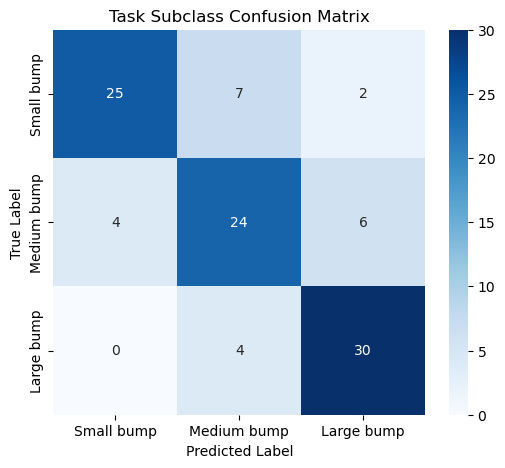

In [40]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(task_subclass_eval_metrics['conf_matrix'], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Small bump', 'Medium bump','Large bump'], yticklabels=['Small bump', 'Medium bump','Large bump'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Task Subclass Confusion Matrix')
plt.savefig('work_dirs/project-experiment-result/swin-base/task-subclass/confusion_matrix.jpg', dpi=300)
plt.show()

In [14]:
import os
import re
import cv2
import numpy as np
from itertools import groupby
from mmaction.apis import init_recognizer, inference_recognizer
from operator import itemgetter

In [2]:
%cd mmaction2

D:\jupyterNotebook\C8099\Project\mmaction2


In [17]:
def parse_filename(filename):
        """
    Parses the filename to extract details.

    Parameters:
    - filename (str): The video file name to parse.

    Returns:
    - dict: Parsed components including sequence, view, class, start frame,
      end frame, part (if available), and the original filename.
    - None: If the filename doesn't match the expected patterns.
    """
    
    # Pattern for filenames with part number
    pattern_with_part = r"(\d+)_([A-Za-z_]+)_class_(\d+)_segment_(\d+)_(\d+)_part_(\d+).mp4"
    # Pattern for filenames without part number
    pattern_without_part = r"(\d+)_([A-Za-z_]+)_class_(\d+)_segment_(\d+)_(\d+).mp4"
    
    # Try pattern with part number
    match = re.match(pattern_with_part, filename)
    if match:
        return {
            "sequence": int(match.group(1)),
            "view": match.group(2),
            "class": int(match.group(3)),
            "start_frame": int(match.group(4)),
            "end_frame": int(match.group(5)),
            "part": int(match.group(6)),
            "filename": filename
        }
    
    # Try pattern without part number
    match = re.match(pattern_without_part, filename)
    if match:
        return {
            "sequence": int(match.group(1)),
            "view": match.group(2),
            "class": int(match.group(3)),
            "start_frame": int(match.group(4)),
            "end_frame": int(match.group(5)),
            "part": None,  # 没有 part 信息
            "filename": filename
        }
    
    # Return None if no pattern matches
    return None

In [18]:
def collect_videos_info(input_folder, exclude_folders):
    """
    Collects and parses information from video files in the specified folder, excluding certain subfolders.

    Parameters:
    - input_folder (str): The directory to search for video files.
    - exclude_folders (list of str): List of subfolder names to exclude from the search.

    Returns:
    - list of dict: A list of dictionaries containing parsed video information, 
                    sorted by sequence, view, start frame, end frame, and part.
    """
    videos_info = []

    # Traverse the directory tree
    for root, dirs, files in os.walk(input_folder):
        # Exclude specified subfolders from the search
        dirs[:] = [d for d in dirs if d not in exclude_folders]

        # Process each file in the current directory
        for filename in files:
            # Check if the file is a video file
            if filename.endswith('.mp4'):
                # Parse the filename to extract information
                info = parse_filename(filename)
                if info:
                    # Add the class (folder name) to the information
                    info['class'] = os.path.basename(root)
                    # Append the information to the list
                    videos_info.append(info)

    # Sort the collected information
    videos_info.sort(key=lambda x: (x['sequence'], x['view'], x['start_frame'], 
                                    x['end_frame'], (x['part'] if x['part'] is not None else 0)))
    
    return videos_info

In [22]:
def process_videos(videos_info, input_folder, output_folder, model_task_normal, model_task_subclass, 
                   label_map_task_normal, label_map_task_subclass):
    """
    Processes video files by combining them into a single video for each sequence and view,
    and annotates the video frames with inference results and real labels.

    Parameters:
    - videos_info (list of dict): List of video file information including metadata.
    - input_folder (str): Directory where input video files are stored.
    - output_folder (str): Directory where combined and annotated video files will be saved.
    - model_task_normal (object): Model for the normal task inference.
    - model_task_subclass (object): Model for the subclass task inference.
    - label_map_task_normal (dict): Mapping from label indices to class names for the normal task.
    - label_map_task_subclass (dict): Mapping from subclass label indices to class names.
    """
    
    # Group videos by sequence number and view
    grouped_videos = groupby(sorted(videos_info, key=itemgetter('sequence', 'view')), 
                             key=lambda x: (x['sequence'], x['view']))
    for key, group in grouped_videos:
        group = list(group)
        if not group:
            continue

        # Get the path of the first video to determine video properties
        first_video_path = os.path.join(input_folder, group[0]['class'], group[0]['filename'])
        cap = cv2.VideoCapture(first_video_path)
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        cap.release()

        # Output file path
        output_file = os.path.join(output_folder, f'{key[0]}_{key[1]}_combined.mp4')
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

        for video_info in group:
            video_path = os.path.join(input_folder, video_info['class'], video_info['filename'])

            # Perform inference with the normal Task Model
            result_task_normal = inference_recognizer(model_task_normal, video_path)
            pred_label_task_normal = result_task_normal.pred_label.item()
            pred_score_task_normal = result_task_normal.pred_score[pred_label_task_normal].item()

            # Perform inference with the subclass model if the normal task label is 1
            if pred_label_task_normal == 1:
                result_task_subclass = inference_recognizer(model_task_subclass, video_path)
                pred_label_task_subclass = result_task_subclass.pred_label.item()
                pred_score_task_subclass = result_task_subclass.pred_score[pred_label_task_subclass].item()
                label_task_subclass = label_map_task_subclass[pred_label_task_subclass]
            else:
                pred_label_task_subclass = pred_score_task_subclass = label_task_subclass = None

            # Read and process the video frames
            cap = cv2.VideoCapture(video_path)
            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                # Real label
                real_label = int(video_info['class'].split('_')[-1])
                real_label_text = f'Real label: {label_map_task_normal[int(real_label==1)]}' \
                if real_label == 0 \
                else f'Real label: {label_map_task_subclass[real_label-1]}'

                # Real label position and color
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.8
                font_thickness = 2
                text_size_real_label = cv2.getTextSize(real_label_text, font, font_scale, font_thickness)[0]
                text_x_real_label = (width - text_size_real_label[0]) // 2
                text_y_real_label = height - 80 
                cv2.putText(frame, real_label_text, (text_x_real_label, text_y_real_label), 
                            font, font_scale, (255, 255, 255), font_thickness)
                
                # Display Task Normal inference results
                text_task_normal = f'Inference: {label_map_task_normal[pred_label_task_normal]} (Pred score: {pred_score_task_normal:.2f})'
                text_color_normal = (0, 255, 0) \
                if (pred_label_task_normal == 0 and real_label == 0) \
                or (pred_label_task_normal == 1 and int(real_label) > 0) else (0, 0, 255)
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.8
                font_thickness = 2
                text_size_task_normal = cv2.getTextSize(text_task_normal, font, font_scale, font_thickness)[0]
                text_x_task_normal = (width - text_size_task_normal[0]) // 2
                text_y_task_normal = height - 40

                cv2.putText(frame, text_task_normal, (text_x_task_normal, text_y_task_normal), 
                            font, font_scale, text_color_normal, font_thickness)

                # Display Task Subclass inference results
                if pred_label_task_subclass is not None:
                    text_task_subclass = f' {label_task_subclass} (Pred score: {pred_score_task_subclass:.2f})'
                    text_color_subclass = (0, 255, 0) if pred_label_task_subclass == (real_label - 1) else (0, 0, 255)
                    text_size_task_subclass = cv2.getTextSize(text_task_subclass, font, font_scale, font_thickness)[0]
                    text_x_task_subclass = (width - text_size_task_subclass[0]) // 2
                    text_y_task_subclass = height - 10

                    cv2.putText(frame, text_task_subclass, (text_x_task_subclass, text_y_task_subclass), 
                                font, font_scale, text_color_subclass, font_thickness)

                out.write(frame)

            cap.release()

        out.release()
        print(f'Output and saved video to: {output_file}')

In [20]:
# Paths to configuration and checkpoint files
config_path_task_normal = 'configs/recognition/swin/swin-base-goosebumps-project-task-normal.py'
checkpoint_path_task_normal = 'work_dirs/project-experiment-result/swin-base/task-normal/best_acc_top1_epoch_28.pth'

config_path_task_subclass = 'configs/recognition/swin/swin-base-goosebumps-project-task-subclass.py'
checkpoint_path_task_subclass = 'work_dirs/project-experiment-result/swin-base/task-subclass/epoch_36.pth'

input_folder = 'data/Goosebumps_videos_multi_task'
output_folder = 'inference_output_videos'

# Folders to exclude
exclude_folders = {'class_2_augment', 'class_3_augment'}

# Create Output Folder
os.makedirs(output_folder, exist_ok=True)

# Initialise the model
model_task_normal = init_recognizer(config_path_task_normal, checkpoint_path_task_normal, device="cuda:0")
model_task_subclass = init_recognizer(config_path_task_subclass, checkpoint_path_task_subclass, device="cuda:0")

# Label mapping
label_map_task_normal = {0: 'No Goosebumps', 1: 'Goosebumps'}
label_map_task_subclass = {0: 'Small bump', 1: 'Medium bump', 2: 'Large bump'}

Loads checkpoint by local backend from path: work_dirs/project-experiment-result/swin-base/task-normal/best_acc_top1_epoch_28.pth
Loads checkpoint by local backend from path: work_dirs/project-experiment-result/swin-base/task-subclass/epoch_36.pth


In [23]:
# Iterate through each folder in the input directory
for view_folder in os.listdir(input_folder):
    # Construct the path to the current view folder
    view_path = os.path.join(input_folder, view_folder)

    # Skip if the path is not a directory
    if not os.path.isdir(view_path):
        continue

    # Collect video metadata from the current view folder
    videos_info = collect_videos_info(view_path, exclude_folders)

    # Process and combine videos, then save the output
    process_videos(videos_info, view_path, output_folder, model_task_normal, 
                   model_task_subclass, label_map_task_normal, label_map_task_subclass)

print(f'Successfully output all the videos')

Output and saved video to: inference_output_videos\101_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\103_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\105_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\107_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\108_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\109_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\111_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\115_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\117_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\121_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\123_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\124_Dom_arm_combined.mp4
Output and saved video to: inference_output_videos\127_Dom_arm_combined.mp4
Output and s

In [24]:
# Define input and output folders
input_folder = 'inference_output_videos'
output_folder = 'inference_result_visualization_videos'

# Create output directory if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Retrieve all unique sequence numbers from video filenames
sequence_numbers = set()
for filename in os.listdir(input_folder):
    if filename.endswith('_combined.mp4'):
        seq_number = filename.split('_')[0]
        sequence_numbers.add(seq_number)
sequence_numbers = sorted(sequence_numbers)

# Process each sequence
for seq in sequence_numbers:
    print(f'Processing sequence {seq}')

    # Construct file paths for the four video categories
    right_thigh_path = os.path.join(input_folder, f'{seq}_Right_thigh_combined.mp4')
    left_thigh_path = os.path.join(input_folder, f'{seq}_Left_thigh_combined.mp4')
    dom_arm_path = os.path.join(input_folder, f'{seq}_Dom_arm_combined.mp4')
    dom_calf_path = os.path.join(input_folder, f'{seq}_Dom_calf_combined.mp4')

    # Open video files
    cap_right_thigh = cv2.VideoCapture(right_thigh_path)
    cap_left_thigh = cv2.VideoCapture(left_thigh_path)
    cap_dom_arm = cv2.VideoCapture(dom_arm_path)
    cap_dom_calf = cv2.VideoCapture(dom_calf_path)

    # Retrieve video properties
    fps = int(cap_right_thigh.get(cv2.CAP_PROP_FPS))
    width = int(cap_right_thigh.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap_right_thigh.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Get frame counts for each video
    frame_counts = {
        'right_thigh': int(cap_right_thigh.get(cv2.CAP_PROP_FRAME_COUNT)),
        'left_thigh': int(cap_left_thigh.get(cv2.CAP_PROP_FRAME_COUNT)),
        'dom_arm': int(cap_dom_arm.get(cv2.CAP_PROP_FRAME_COUNT)),
         'dom_calf': int(cap_dom_calf.get(cv2.CAP_PROP_FRAME_COUNT))
    }

    # Determine the minimum frame count among the videos
    min_frame_count = min(frame_counts.values())
    
    # Set up the output video properties
    output_width = 1920
    output_height = 1080
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(os.path.join(output_folder, f'{seq}_inference_result.mp4'), fourcc, fps, (output_width, output_height))

    # Process each frame up to the minimum frame count
    for _ in range(min_frame_count):
        ret_right_thigh, frame_right_thigh = cap_right_thigh.read()
        ret_left_thigh, frame_left_thigh = cap_left_thigh.read()
        ret_dom_arm, frame_dom_arm = cap_dom_arm.read()
        ret_dom_calf, frame_dom_calf = cap_dom_calf.read()

        # Check if frames were successfully read
        if not (ret_right_thigh and ret_left_thigh and ret_dom_arm and ret_dom_calf):
            break

        # Create a black background for merging frames
        merged_frame = np.zeros((output_height, output_width, 3), dtype=np.uint8)

        # Stitch video frames to the appropriate position
        merged_frame[0:540, 0:734] = frame_right_thigh  # Top-left
        merged_frame[0:540, 734:1468] = frame_dom_arm  # Top-right
        merged_frame[540:1080, 0:734] = frame_left_thigh  # Bottom-left
        merged_frame[540:1080, 734:1468] = frame_dom_calf  # Bottom-right

        # Write the merged frame to the output video file
        out.write(merged_frame)
        print(f'Finished processing sequence {seq}')

    # Release resources for each video capture and the video writer
    cap_right_thigh.release()
    cap_left_thigh.release()
    cap_dom_arm.release()
    cap_dom_calf.release()
    out.release()

print("Processing complete.")

Processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing sequence 101
Finished processing

# Utils

In [ ]:
from utils import calculate_total_time_for_train

In [50]:
json_file_path = 'work_dirs/project-experiment-result/swin-base/task-subclass/log.json' 
total_time = calculate_total_time_for_train(json_file_path)
print(f'Total time for train mode: {total_time}')

Total time for train mode: 265.52928994894023
